In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from copy import copy
from matplotlib import gridspec
from pathlib import Path
from random import sample, choice, choices

from My_libraries.my_stats import half_frame
# from my_stats import half_frame

my_font_size = 15

# Statistical intervals

One can obtain a point estimate for a statistic from sample data.  The point estimate, however, does not tell us what the range of plausible values for the estimate is.  For that, we need a confidence interval.  Typically, the **confidence interval** is calculated from the same sample data used to obtain the point estimate.

## Confidence Interval

The width of a confidence interval conveys information about the precision of the estimation.  Short intervals indicate a precise estimate.  

Note that **one cannot ever be certain that the confidence interval contains the true value of the parameter one is trying to estimate**.  

Confidence interval are built for a certain degree of confidence, for example, 95%, and for a given sample size.  

The confidence interval for the parameter $\mu$ of a normal distribution obeys the relationship

> $~~~~~~~~~~~ P( \mu_L \le \mu \le \mu_U ) = 1 - \alpha$

where $0 \le \alpha \le 1$, and $\mu_L$ and $\mu_U$ are the lower and upper bounds of the interval, respectively.  

What this means is that **a random sample of the same size has a $1 - \alpha$ probability of yielding a confidence interval that contains the true value of $\mu$**.

That is why we **do not** say that the confidence interval has a $1-\alpha$ probability of containing $\mu$.  We say that **we have $100(1-\alpha)$% confidence that the interval contains $\mu$**.

.

.

.

.

.

.

.

## Tolerance interval

An important type of interval estimate is the tolerance interval.  The tolerance interval takes into consideration the fact that nearly always we do not know the true values of the mean or standard deviation. For that reason, if we want to be provide a more realistic estimate of the uncertainty in our point estimate, because, for example, the consequences of an error in the estimate can be catastrophic, then we must consider wider bounds on the range of plausible values for our estimate.

## Prediction interval

A prediction interval bounds future observations from a population or distribution. Recall that the tolerance and confidence interval bounds plausible values for a point estimate of a statistic such as the sample mean.  

**The prediction interval bounds the plausible value for a single data point!**

A prediction interval is typically (much) wider than a confidence interval, especially if the confidence interval is obtained from a large sample.

.

.

.

.

.

.

.



# Confidence intervals

## Sample mean of a normal distribution

### Variance is known

For a random sample of size $n$ drawn from a normal distribution with mean $\mu$ and variance $\sigma^2$, we know that the sample mean obeys the condition:

> $~~~~~~~~\bar x \to N\left(\mu, \frac{\sigma}{\sqrt n} \right)$

thus, we can define a new random variable $Z$ that follows a *standard* normal distribution

> $~~~~~~~~Z = \frac{\bar X - \mu}{\frac{\sigma}{\sqrt{n}}} \to N(0, 1)$

If we denote by $z_{\alpha / 2}$ the **upper** $100\alpha / 2$ percentile of the standard normal distribution, then the confidence interval for $\mu - \bar x$ is

> $~~~~~~~~- z_{\alpha / 2} \frac{\sigma}{\sqrt n} ~~\le ~~\mu - \bar x  ~~\le ~~z_{\alpha / 2} \frac{\sigma}{\sqrt n}$

and it follows that 

> $~~~~~~~~\bar x - z_{\alpha / 2} \frac{\sigma}{\sqrt n} ~~\le ~~\mu ~~\le ~~\bar x + z_{\alpha / 2} \frac{\sigma}{\sqrt n}$

Two common values for $\alpha$ are 0.05 and 0.01. The corresponding percentile values are 1.96 and 2.58.

It follows that the confidence interval grows in length with the confidence level. 

**So, how can one obtain a narrow confidence interval with high confidence?**

Yes, you are correct (I hope!!)

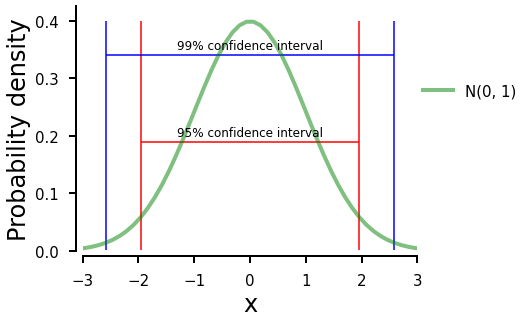

In [2]:
mu, sigma = 0, 1.
x1 = np.linspace(stats.norm.ppf(0.001, mu, sigma), stats.norm.ppf(0.999, mu, sigma))
rv = stats.norm(mu, sigma)

x_u5 = stats.norm.ppf(1-0.05/2, mu, sigma)
x_u1 = stats.norm.ppf(1-0.01/2, mu, sigma)

fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
half_frame(ax, "x", "Probability density", font_size = my_font_size)

# Calculate and plot histogram
ax.plot(x1, rv.pdf(x1), color = "g", linewidth = 4, alpha = 0.5, label = "N(0, 1)")
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 0.425)

# lines and text
#
ax.vlines([-x_u5, -x_u1, x_u1, x_u5], 0.001, 0.4, colors = ['r', 'b', 'b', 'r'])
ax.text(0., 0.2, '95% confidence interval', ha = 'center', fontsize = 0.8*my_font_size )
ax.hlines(0.19, -x_u5, x_u5, color = 'r')
ax.text(0., 0.35, '99% confidence interval', ha = 'center', fontsize = 0.8*my_font_size )
ax.hlines(0.34, -x_u1, x_u1, color = 'b')

plt.show()

### Variance is unknown

Consider the sample mean for a normal distribution with unknown mean and unknown variance. Then, the random variable

> $~~~~~~~~~~T = \frac{\bar X - \mu}{\frac{S}{\sqrt n}}~~\to ~~t(n-1)$  ,

that is, it follows a **$t$ distribution** with $n-1$ degrees of freedom.

If we denote by $t_{\alpha / 2, n-1}$ the upper $100\alpha / 2$ percentile of the $t$ distribution, then the confidence interval for $\mu$ is

> $~~~~~~~~\bar x - t_{\alpha / 2, n-1} \frac{s}{\sqrt n} ~~ \le ~~\mu ~~\le ~~\bar x + t_{\alpha / 2, n-1} \frac{s}{\sqrt n}$

As you can see in the graph below, for $n = 4$, the interval is about twice as wide as for the case of a known variance, but for $n > 10$, the increase in interval width is already getting quite small.

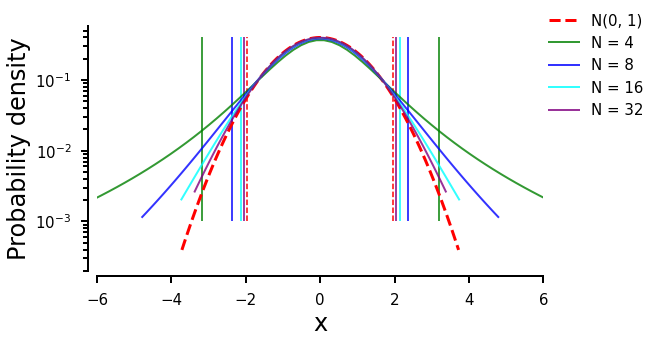

In [3]:
fig = plt.figure( figsize = (8, 4.5) )
ax = fig.add_subplot(1,1,1)

half_frame(ax, "x", "Probability density", font_size = my_font_size)

# For standard normal
#
mu, sigma = 0, 1.
x1 = np.linspace(stats.norm.ppf(0.0001, mu, sigma), stats.norm.ppf(0.9999, mu, sigma), num = 100)
f_x = stats.norm(mu, sigma)
ax.plot(x1, f_x.pdf(x1), 'r--', linewidth = 3, alpha = 1, label = "N(0, 1)")
ax.vlines([-1.96, 1.96], 0.001, 0.4, linestyle = '--', color = 'r')
ax.set_xlim(-6, 6)

# For t-distributions with different N-1 degrees of freedom
#
for my_color, N in zip(['g', 'b', 'cyan', 'purple'], [4, 8, 16, 32]):
    x1 = np.linspace(stats.t.ppf(0.001, N-1), stats.t.ppf(0.999, N-1), num = 100)
    rv = stats.t(N-1)

    # Plot histogram
    ax.semilogy(x1, rv.pdf(x1), linewidth = 2, alpha = 0.8, color = my_color, label = f'N = {N}')

    t_n = stats.t.ppf(1-0.05/2, N-1)
    ax.vlines([-t_n, t_n], 0.001, 0.4, colors = my_color)


ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)
plt.show()

## Sample variance of a normal distribution


Consider the sample standard deviation for a normal distribution with unknown mean and unknown variance. Then, the random variable

$~~~~~~~~~~X^2 = \frac{(n-1)}{\sigma^2}~ S^2 ~~ \to ~~ \chi^2(n-1)$  ,

that is, it follows a $\chi^2$ distribution with $n-1$ degrees of freedom.

If we denote by $\chi^2_{\alpha / 2, n-1}$ the upper $100\alpha / 2$ percentile of the $\chi^2$ distribution, then the confidence interval for $\sigma^2$ is

$~~~~~~~~\frac{(n-1)}{\chi^2_{\alpha / 2, n-1}}~s^2 ~~\le~~ \sigma^2 ~~\le ~~\frac{(n-1)}{\chi^2_{1-\alpha / 2, n-1}}~s^2$

Notice the the term $\chi^2_{\alpha / 2, n-1}$ appears in the denominator, so the closer it gets to $n-1$ the tighter the confidence intervals for $\sigma^2$ are around the observed value of $s^2$.

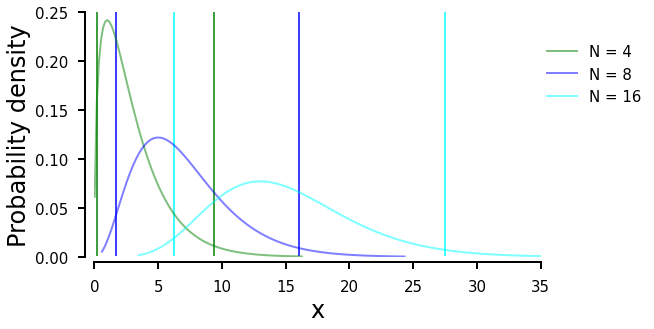

In [4]:
fig = plt.figure( figsize = (8, 4.5) )
ax = fig.add_subplot(1,1,1)

half_frame(ax, "x", "Probability density", font_size = my_font_size)

for my_color, N in zip(['g', 'b', 'cyan'], [4, 8, 16]):
    x1 = np.linspace(stats.chi2.ppf(0.001, N-1), stats.chi2.ppf(0.999, N-1), num = 100)
    rv = stats.chi2(N-1)

    # Calculate and plot histogram
    ax.plot(x1, rv.pdf(x1), linewidth = 2, alpha = 0.5, color = my_color, label = f"N = {N}")

    x2_n_plus = stats.chi2.ppf(1-0.05/2, N-1)
    x2_n_minus = stats.chi2.ppf(0.05/2, N-1)
    ax.vlines([x2_n_minus, x2_n_plus], 0.001, 0.25, colors = my_color)

    
ax.set_xlim(0, 35)
ax.set_ylim(0, 0.25)
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)

plt.show()

## Sample proportion for large $n$


Consider the random variable

> $~~~~~~~~~~Z = \frac{X - np}{\sqrt{np(1-p)}}$

where $n$ and $p$ are the parameters of a binomial process.  Then, $Z$ is approximately distributed as a standard normal (as long a $np \gg 1$). 

If we denote by $z_{\alpha / 2}$ the upper $100\alpha / 2$ percentile of the standard normal  distribution, then the confidence interval for $p$ is

> $~~~~~~~~\hat p - z_{\alpha / 2} \sqrt{\frac{\hat p ~(1 - \hat p)}{n}}~~ \le ~~p ~~\le ~~\hat p + z_{\alpha / 2} \sqrt{\frac{\hat p ~(1 - \hat p)}{n}}$




# Confidence intervals for non-Gaussian random variables


## When we know the distribution

If we know the distribution from which our sample was drawn, then we can use **Monte Carlo methods** to simulate the process of generating samples and quickly determine the confidence intervals (in fact, any statistical intervals).

In the cell below, we will write example code for the case were a sample was drawn from an exponential distribution.

Let's assume for concreteness, that we have a sample of size $n = 20$ and sample mean $\bar x = 1.13$.

1. Generate a large number of **synthetic samples** drawn from an exponential distribution and with parameter $\lambda = 1 / {\bar x}$.

    a. The number of synthetic samples would depend on the desired significance level $\alpha$.  For example, if $\alpha = 0.05$, then the desired confidence interval is the 95% one.  That means that we need at least 20 synthetic samples to be able to define a **CI 95**.  In fact, having at least several fold that number would be better.

    b. Continuing with this concrete case, we would generate 100 synthetic samples.
    


2. Calculate the sample mean of each of the synthetic samples.



3. Calculate the 2.5 percentile, and the 97.5 percentile of the set of sample means of the synthetic samples. These values would provide the bounds of CI 95.

Try it!



4. For fun, plot also the distribution of samples means of the synthetic samples, and mark on the graph the CI 95 and the the sample mean of the assumed sample.


In [ ]:
xv = expon.rvs(0, 1./1.13, size = 20)
print(xv, np.mean(xv))

## When we do not know the distribution

If we do not really have any idea from which distribution our sample was drawn, then we have to use **bootstrap**.

The distribution of heights of people is not exactly a Gaussian (see notebook 21).  How could we use the data and bootstrapping to estimate a confidence interval for the sample mean of the data?

We would do pretty much the same procedure described above.  However, step 1 above would be replaced with

1. Generate a large number of synthetic samples with the same size as the original sample but using bootstrapping.

Try it!


In [ ]:
xv = choices(sample, replace= True, size= len(sample))